# Flights Data Exploration Challenge
This notebook  explore the flights datasets of the US Department of Transportation

>**Note:** The Challenge is based on the  Microsoft learn basics of machine learning path

## Libraries

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Load data
!wget https://raw.githubusercontent.com/ade-mic/ml-basics/master/challenges/data/flights.csv

df_flights = pd.read_csv('flights.csv')
df_flights.head()

--2023-04-08 14:35:32--  https://raw.githubusercontent.com/ade-mic/ml-basics/master/challenges/data/flights.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35862658 (34M) [text/plain]
Saving to: ‘flights.csv.1’

flights.csv.1       100%[===================>]  34.20M  2.65MB/s    in 11s     

2023-04-08 14:35:43 (3.00 MB/s) - ‘flights.csv.1’ saved [35862658/35862658]



,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


## Handling Missing Data

In [3]:
display("The shape of the dataframe is {}".format(df_flights.shape))
df_flights.isnull().sum()

'The shape of the dataframe is (271940, 20)'

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [4]:
df_flights[df_flights['DepDel15'].isnull()][['DepDelay', 'DepDel15']]

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

* **Year**: The year of the flight (all records are from 2013)
* **DayofMonth**: The day of the month on which the flight departed
* **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
* **Carrier**: The two-letter abbreviation for the airline.
* **OriginAirportID**: A unique numeric identifier for the departure aiport
* **OriginAirportName**: The full name of the departure airport
* **OriginCity**: The departure airport city
* **OriginState**: The departure airport state
* **DestAirportID**: A unique numeric identifier for the destination aiport
* **DestAirportName**: The full name of the destination airport
* **DestCity**: The destination airport city
* **DestState**: The destination airport state
* **CRSDepTime**: The scheduled departure time
* **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
* **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
* **CRSArrTime**: The scheduled arrival time
* **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
* **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
* **Cancelled**: A binary indicator that the flight was cancelled

In [5]:
df_flights[df_flights.isnull().any(axis=1)].DepDelay.describe()

count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

The column only have column of 0, so filling it with 0

In [6]:
# Filling the missing data with 0
df_flights['DepDel15'] = df_flights.DepDel15.fillna(0)

In [7]:

# A funtion that shows data distribution 
def show_distribution(var_data):
    # statistics needed
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    # import matplotlib.pyplot if not yet imported
    import matplotlib.pyplot as plt

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.
          format(min_val, mean_val, med_val, mod_val, max_val))
    
    # Creating a figure forr 2 subplots ( 2 rowws, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10, 4))
    
    # Plot the histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')
    
    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color='gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color='cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color='red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color='yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color='gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle ('Data Distribution')

    # Show the figure
    fig.show()

# Probability density function distribution plot

def show_density(var_data):
    # import matplotlib.pyplot if not yet imported
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(10, 4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, mode
    plt.axvline(x=var_data.mean(), color='cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x = var_data.median(), color = 'red', linestyle = 'dashed', linewidth = 2)
    plt.axvline(var_data.mode[0], color ='yellow', linestyle='dashed', linewidth = 2)

    # show the figure
    plt.show()





Minimum:-63.00
Mean:10.35
Median-1.00
Mode:-3.00
Maximum:1425.00



/tmp/ipykernel_25788/2680845134.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


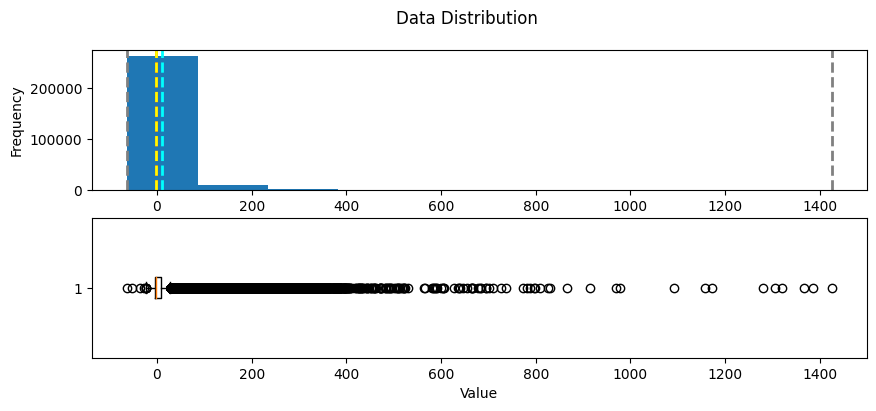

In [8]:
# Exploring the DepDelay and ArrDelay column

# show distribution of Departure delay in minutes
show_distribution(df_flights['DepDelay'])

- Using the thumb rule that the outlier fall below or above 90 and 1percentiles within which most of the data lie


Minimum:-11.00
Mean:1.49
Median-1.00
Mode:-3.00
Maximum:36.00



/tmp/ipykernel_25788/2680845134.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


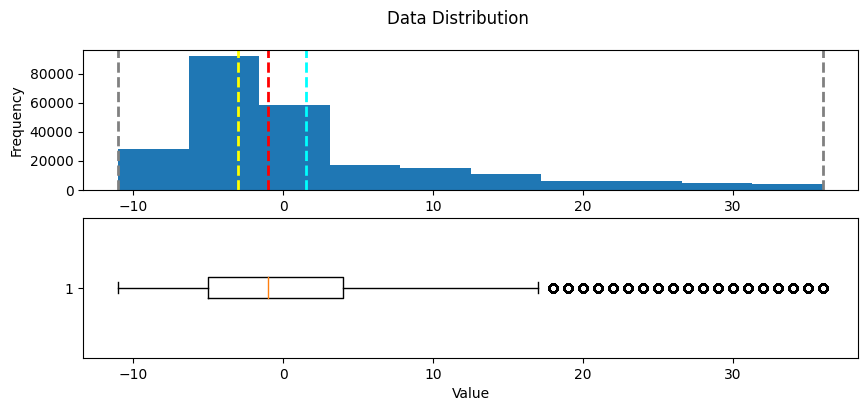

In [9]:
# calculate the 0.01th and 90th percentile
q90 = df_flights.DepDelay.quantile(0.90)
q01 = df_flights.DepDelay.quantile(0.01)
# Get thhe variable to examine 
df_flights = df_flights[df_flights.DepDelay < q90]
df_flights = df_flights[df_flights.DepDelay > q01 ]
col = df_flights['DepDelay']

# Call the distribution function
show_distribution(col)


Exploring the distribution of ArrDelay

Minimum:-75.00
Mean:-2.50
Median-4.00
Mode:0.00
Maximum:186.00



/tmp/ipykernel_25788/2680845134.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


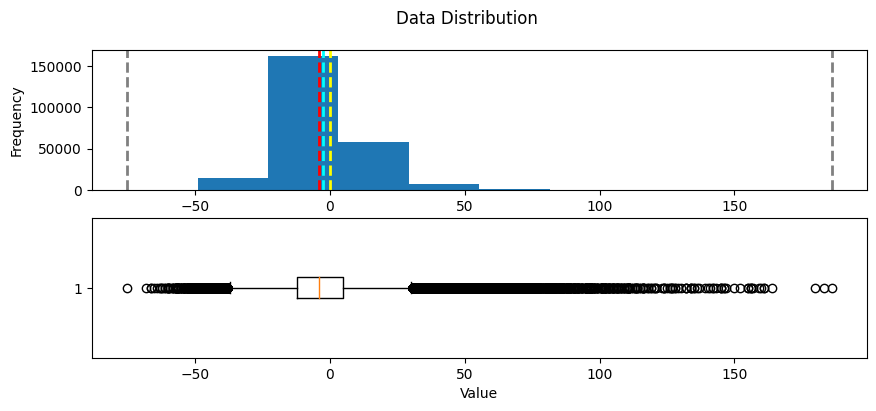

In [10]:
# check the distribution of flights greter than 400
col = df_flights['ArrDelay']
show_distribution(col)

Some values are less than 0 and also removing outliers value greater than 99th percentile

Minimum:-32.00
Mean:-5.68
Median-6.00
Mode:0.00
Maximum:16.00



/tmp/ipykernel_25788/2680845134.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


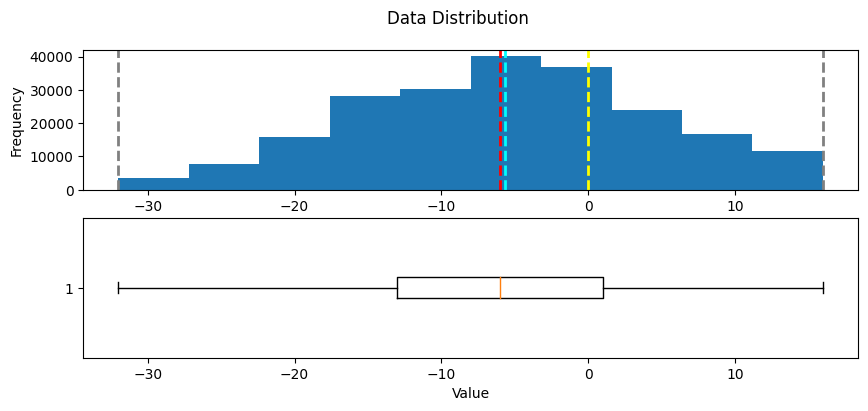

In [11]:
q90 = df_flights['ArrDelay'].quantile(0.90)
q01 = df_flights['ArrDelay'].quantile(0.01)
df_flights = df_flights[df_flights['ArrDelay'] < q90]
df_flights = df_flights[df_flights['ArrDelay'] > q01]

col = df_flights['ArrDelay']
show_distribution(col)

Summarry of Numaric data

In [12]:
#check the data type of the variables
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214500 entries, 0 to 271938
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               214500 non-null  int64  
 1   Month              214500 non-null  int64  
 2   DayofMonth         214500 non-null  int64  
 3   DayOfWeek          214500 non-null  int64  
 4   Carrier            214500 non-null  object 
 5   OriginAirportID    214500 non-null  int64  
 6   OriginAirportName  214500 non-null  object 
 7   OriginCity         214500 non-null  object 
 8   OriginState        214500 non-null  object 
 9   DestAirportID      214500 non-null  int64  
 10  DestAirportName    214500 non-null  object 
 11  DestCity           214500 non-null  object 
 12  DestState          214500 non-null  object 
 13  CRSDepTime         214500 non-null  int64  
 14  DepDelay           214500 non-null  int64  
 15  DepDel15           214500 non-null  float64
 16  CR

In [13]:
#Changin the Year, month, day of the week to Datetime data type
df_flights['Date'] = df_flights[['Year', 'Month', 'DayofMonth']].apply(lambda x: '-'.join(x.values.astype(str)), axis ='columns')
df_flights['Date'] = pd.to_datetime(df_flights['Date'], format='%Y-%m-%d')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,...,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled,Date
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,...,New York,NY,1539,4,0.0,1824,13,0,0,2013-09-16
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,...,Washington,DC,810,-3,0.0,1614,-7,0,0,2013-09-07
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,...,Atlanta,GA,545,-1,0.0,728,-9,0,0,2013-05-16
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,...,Houston,TX,630,-1,0.0,1210,-3,0,0,2013-10-06
7,2013,7,28,7,EV,12264,Washington Dulles International,Washington,DC,14524,...,Richmond,VA,2218,4,0.0,2301,15,1,0,2013-07-28


In [14]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,214500.0,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000
mean,2013.0,7.027296,15.799389,3.904168,12755.329371,12734.206438,1284.230942,-0.130452,0.057604,1465.878522,-5.680522,0.032597,0.013305
std,0.0,2.006267,8.853235,1.998344,1512.139480,1506.103555,470.230018,7.260672,0.232993,487.646410,10.188473,0.177579,0.114579
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,853.000000,-5.000000,0.000000,1055.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1240.000000,-2.000000,0.000000,1448.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1658.000000,2.000000,0.000000,1850.000000,1.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,36.000000,1.000000,2359.000000,16.000000,1.000000,1.000000


In [15]:
df_flights[['ArrDelay', 'DepDelay']].mean()

ArrDelay   -5.680522
DepDelay   -0.130452
dtype: float64

## The Arrival and Departure Delay of different carriers

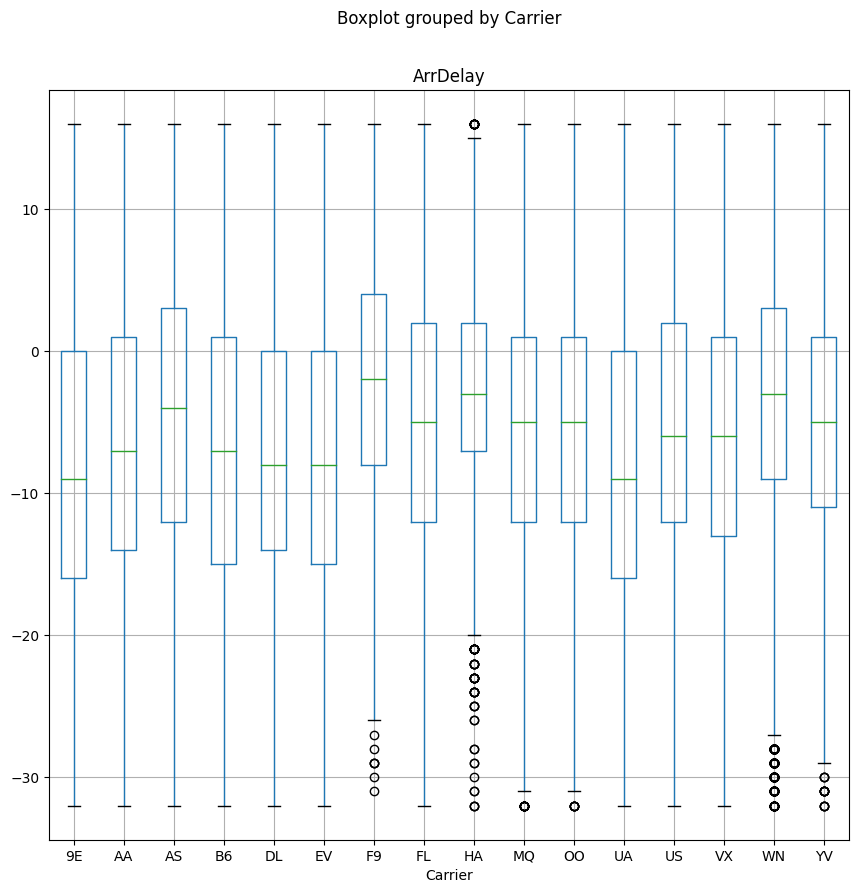

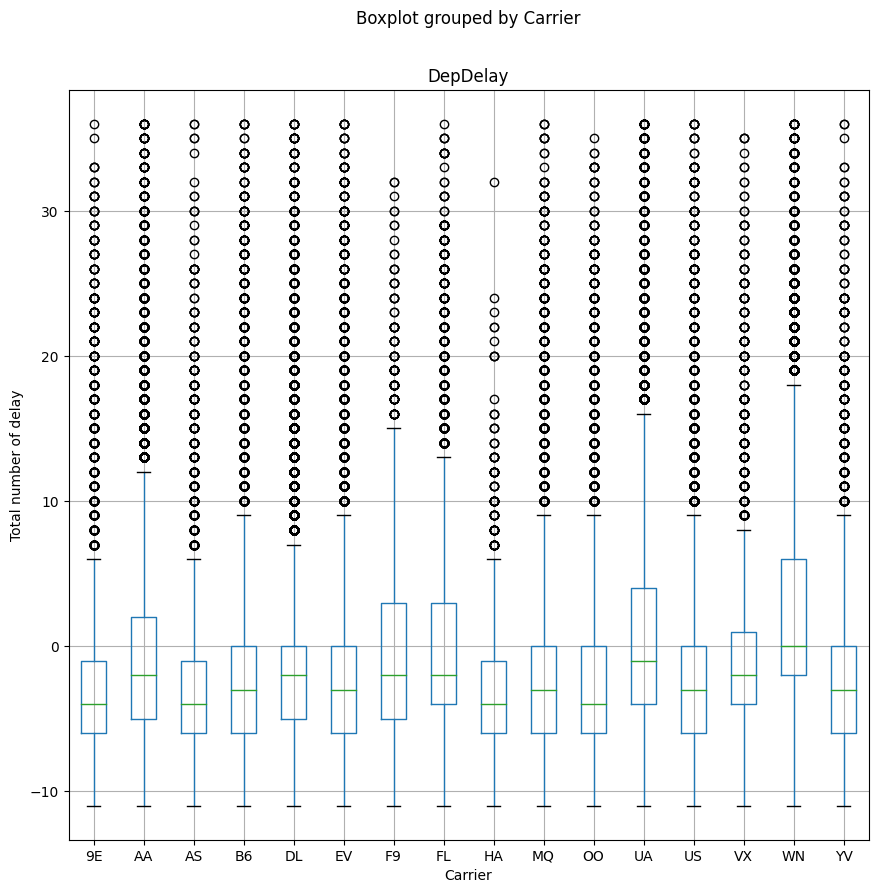

In [16]:
df_flights.boxplot( column='ArrDelay', by='Carrier', figsize=(10,10))
df_flights.boxplot( column='DepDelay', by='Carrier', figsize=(10, 10))
plt.ylabel('Total number of delay')
plt.show()

Days of the week

<function matplotlib.pyplot.show(close=None, block=None)>

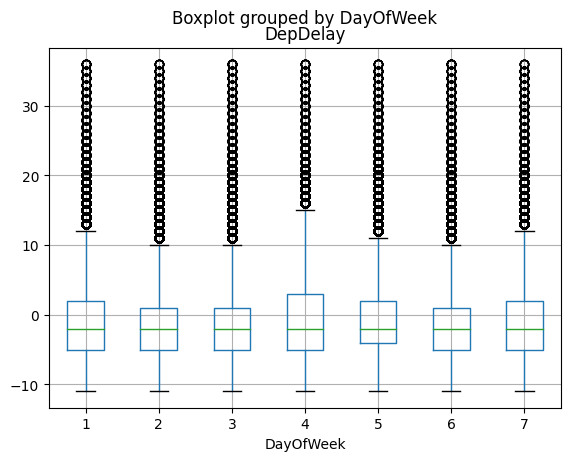

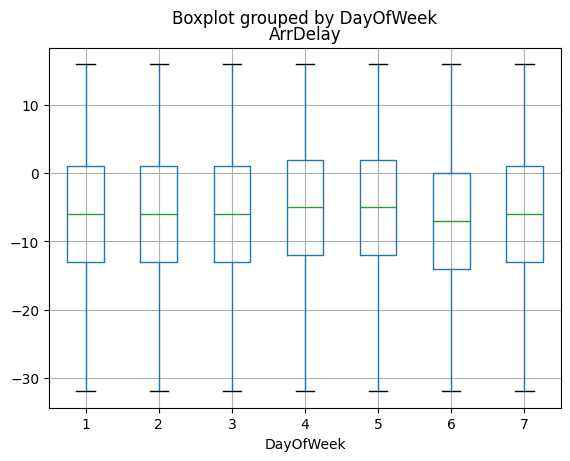

In [17]:

df_flights.boxplot(column='DepDelay', by='DayOfWeek')
df_flights.boxplot(column='ArrDelay', by='DayOfWeek')

plt.show

There are low Delays during weekends

## Which Departure airpoirt has the highest average departure delay?

/tmp/ipykernel_25788/1384759338.py:1: FutureWarning: The operation <function mean at 0x7fed3c0da1f0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  group_origin_airport = df_flights.groupby('OriginAirportName').agg(np.mean)


<function matplotlib.pyplot.show(close=None, block=None)>

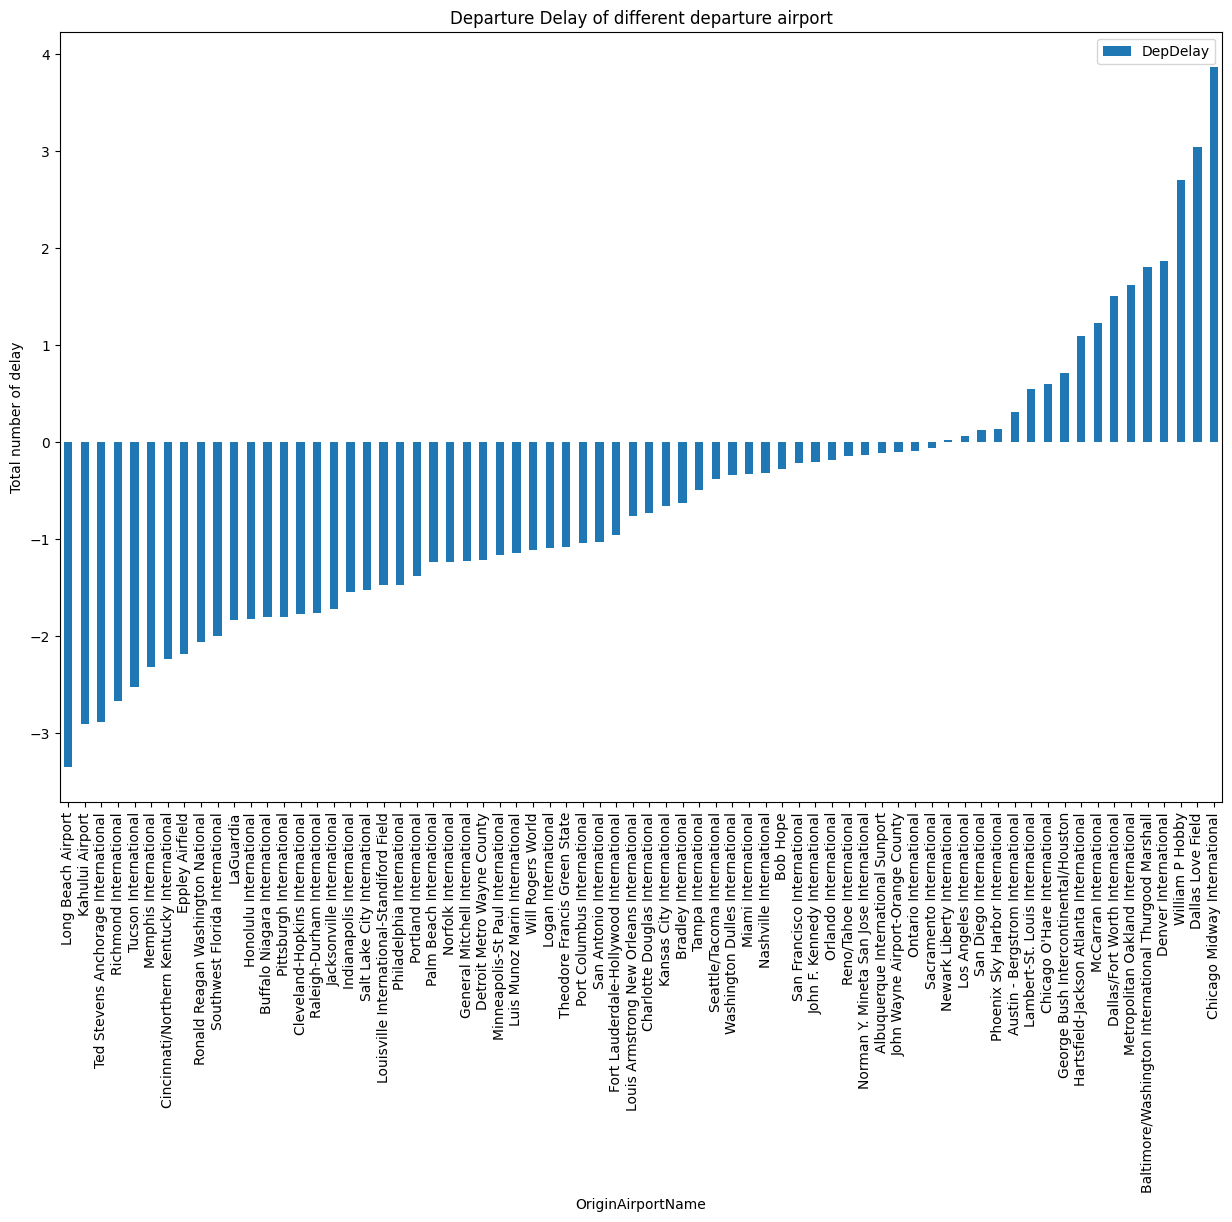

In [18]:
group_origin_airport = df_flights.groupby('OriginAirportName').agg(np.mean)
group_origin_airport.sort_values('DepDelay', ascending=True).plot( y='DepDelay', use_index=True, kind='bar', figsize=(15, 10))

plt.ylabel('Total number of delay')
plt.title('Departure Delay of different departure airport')
plt.show

## Do late departures tend to result in longer arrival delays than on-time departures?


<Axes: title={'center': 'ArrDelay'}, xlabel='DepDel15'>

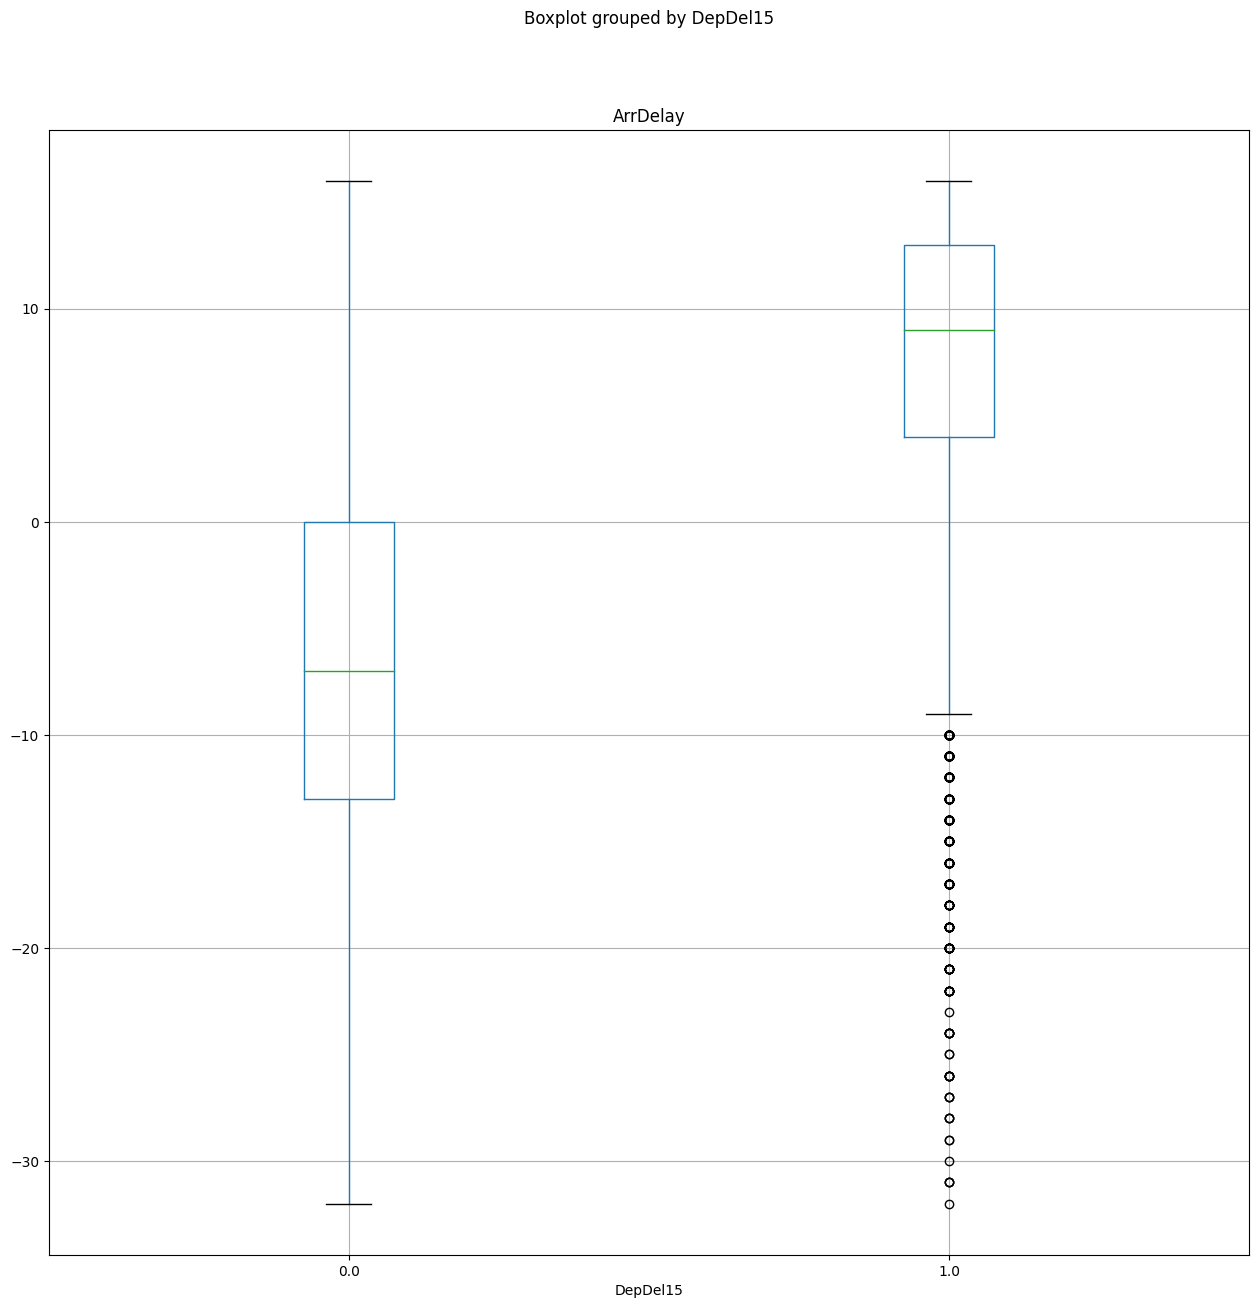

In [19]:
df_flights.boxplot(column='ArrDelay', by='DepDel15', figsize=(15, 15))

## Which route (from origin airport to destination airport) has the most late arrivals?

In [20]:
# Adding route column
route = pd.Series(df_flights['OriginAirportName'] + ' > ' + df_flights['DestAirportName'])
df_flights = pd.concat([df_flights, route.rename('Route')], axis=1)



In [21]:
#Grouping by Route
route_group = df_flights.groupby(df_flights.Route) 
pd.DataFrame(route_group['ArrDel15'].sum()).sort_values('ArrDel15', ascending=False)


,ArrDel15
Route,
San Francisco International > Los Angeles International,67
Los Angeles International > San Francisco International,42
Detroit Metro Wayne County > Chicago O'Hare International,29
LaGuardia > Logan International,29
LaGuardia > Chicago O'Hare International,27
...,...
Norman Y. Mineta San Jose International > Honolulu International,0
Norman Y. Mineta San Jose International > Hartsfield-Jackson Atlanta International,0
Norman Y. Mineta San Jose International > George Bush Intercontinental/Houston,0


Which Route has the highest average late arrivals delays

In [22]:
pd.DataFrame(route_group['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)


,ArrDelay
Route,
Theodore Francis Green State > Southwest Florida International,12.000000
Charlotte Douglas International > General Mitchell International,10.000000
Indianapolis International > Philadelphia International,10.000000
Port Columbus International > Logan International,7.000000
Cleveland-Hopkins International > Philadelphia International,7.000000
...,...
Lambert-St. Louis International > Cleveland-Hopkins International,-20.000000
Jacksonville International > Chicago Midway International,-20.000000
Eppley Airfield > LaGuardia,-20.750000
